In [1]:
library(arm)
library(tidyverse)
library(ggplot2)

Loading required package: MASS
Loading required package: Matrix
Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /home/davide/work_repos/D1-ligands

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


## Read molecular properties data

In [2]:
data1 = read_csv("d1csv.csv")

Warning message:
“Missing column names filled in: 'X4' [4]”Parsed with column specification:
cols(
  .default = col_integer(),
  SMILES = col_character(),
  name = col_character(),
  X4 = col_character(),
  `cAMP EC50` = col_double(),
  `cAMP pEC50` = col_double(),
  `arrestin EC50` = col_double(),
  `arrestin pEC50` = col_double(),
  MW = col_double(),
  AlogP = col_double(),
  PSA = col_double(),
  Estate = col_double(),
  MR = col_double(),
  Polar = col_double(),
  `Molecular weight` = col_double(),
  `fpscreen_02-1` = col_double()
)
See spec(...) for full column specifications.


In [3]:
## we discard some columns (cluster index, fingerprints)
## discard the original cAMP and arrestin potency and efficacy, but keep the ACTIVE columns

data2 = data1 %>% 
select(
    -starts_with("HClust"),
    -starts_with("cAMP"), 'cAMP ACTIVE',
    -starts_with("arrestin"), 'arrestin ACTIVE',
    -'SMILES',
    -'fpscreen_02-1',
    -'X4',
    -'canvasUID') 

#data3 = data2 %>% gather(var,data, -name, -'cAMP ACTIVE', -'arrestin ACTIVE')

In [4]:
data2

name,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,RingCount,⋯,Num positive atoms,Num residues,Num rings,Num rotatable bonds,Percent helix,Percent loop,Percent strand,Total charge,cAMP ACTIVE,arrestin ACTIVE
JL10-185,356.3773,3.3604,5,0,3,27,0,0,5,⋯,0,1,5,3,0,0,0,0,1,1
MLM21-111,357.3654,2.1276,5,1,3,27,0,0,5,⋯,0,1,5,3,0,0,0,0,1,1
MLM21-120,410.3487,3.8165,5,0,4,30,0,0,5,⋯,0,1,5,4,0,0,0,0,1,1
MLM55-13B,346.3825,3.5031,5,1,3,26,0,0,4,⋯,0,1,4,3,0,0,0,0,1,0
MLM55-8,366.4152,4.1927,4,0,3,28,0,0,5,⋯,0,1,5,3,0,0,0,0,1,0
MLM55-9,355.3893,3.9692,4,0,3,27,0,0,5,⋯,0,1,5,3,0,0,0,0,1,0
MLM55-13A,356.3806,2.5946,5,1,3,27,0,0,5,⋯,0,1,5,3,0,0,0,0,1,0
MLM55-11,372.4429,3.9186,4,0,3,27,0,0,5,⋯,0,1,5,3,0,0,0,0,1,1
MLM55-20,395.2526,4.0327,4,0,3,25,0,0,4,⋯,0,1,4,3,0,0,0,0,0,0
MLM55-14,396.4412,4.1830,5,0,4,30,0,0,6,⋯,0,1,6,4,0,0,0,0,1,0


In [7]:
#discard properties with zero variance since they are not informative
nontrivial = data2 %>% select(-name) %>% summarise_all(sd) %>% select_if(function(.) . != 0)  %>% names()
data4 = data2 %>% select("name", one_of(nontrivial))
nontrivial

[1] "MW"                            "AlogP"                        
 [3] "HBA"                           "HBD"                          
 [5] "RB"                            "HeavyAtomCount"               
 [7] "RingCount"                     "PSA"                          
 [9] "Estate"                        "MR"                           
[11] "Polar"                         "Br"                           
[13] "C"                             "F"                            
[15] "H"                             "N"                            
[17] "O"                             "S"                            
[19] "Charged donor groups"          "Donor groups"                 
[21] "H-N"                           "Neutral acceptor groups"      
[23] "Neutral donor groups"          "Acceptor groups"              
[25] "Aliphatic carbons"             "Aromatic basic nitrogens"     
[27] "Aromatic carbons"              "Charged pyridines"            
[29] "Divalent oxygens"              "Heteroaromatic atoms"         
[31] "N-Pyrrole H"                   "Trifluoromethyls"             
[33] "Carbonyls"                     "Catch for uncharged guanine H"
[35] "Ethers"                        "Neutral carbonyls"            
[37] "Nitriles"                      "Tertiary amines or amides"    
[39] "Iron binding groups"           "Molecular weight"             
[41] "Num aliphatic rings"           "Num aromatic rings"           
[43] "Num atoms"                     "Num heavy atoms"              
[45] "Num heteroaromatic rings"      "Num rings"                    
[47] "Num rotatable bonds"           "cAMP ACTIVE"                  
[49] "arrestin ACTIVE"

In [8]:
length(nontrivial)

[1] 49

In [9]:
indep = colnames(data4 %>% select(-'name', -contains('ACTIVE')))

genformulas<-function(
    outcome,
    indep,
    ntot){
    nvars<-length(indep)
    c1<-combn(1:nvars,ntot)
    c2<-apply(c1,FUN=function(x)
        as.formula(paste(outcome,"~",paste0('`',indep[x],'`',collapse="+"),collapse="")),
              MARGIN=2)
    c2}



In [10]:
genformulas('`arrestin ACTIVE`', indep, 2)

[[1]]
`arrestin ACTIVE` ~ MW + AlogP
<environment: 0xffe7a08>

[[2]]
`arrestin ACTIVE` ~ MW + HBA
<environment: 0xffefae8>

[[3]]
`arrestin ACTIVE` ~ MW + HBD
<environment: 0xfff65a0>

[[4]]
`arrestin ACTIVE` ~ MW + RB
<environment: 0xfff7308>

[[5]]
`arrestin ACTIVE` ~ MW + HeavyAtomCount
<environment: 0xfffddc0>

[[6]]
`arrestin ACTIVE` ~ MW + RingCount
<environment: 0xfffeb28>

[[7]]
`arrestin ACTIVE` ~ MW + PSA
<environment: 0x100055e0>

[[8]]
`arrestin ACTIVE` ~ MW + Estate
<environment: 0x10006348>

[[9]]
`arrestin ACTIVE` ~ MW + MR
<environment: 0x1000ce00>

[[10]]
`arrestin ACTIVE` ~ MW + Polar
<environment: 0x10013eb8>

[[11]]
`arrestin ACTIVE` ~ MW + Br
<environment: 0x10014c20>

[[12]]
`arrestin ACTIVE` ~ MW + C
<environment: 0x100197b8>

[[13]]
`arrestin ACTIVE` ~ MW + F
<environment: 0x1001ac00>

[[14]]
`arrestin ACTIVE` ~ MW + H
<environment: 0x100334d8>

[[15]]
`arrestin ACTIVE` ~ MW + N
<environment: 0x10034240>

[[16]]
`arrestin ACTIVE` ~ MW + O
<environment: 0x1003acf

In [162]:
fit_one = function(f) bayesglm(f, data4, family=binomial(link="logit"))
fit_all = function(formulas){
    models = lapply(formulas, fit_one)
    aic = lapply(models, function(m){m$aic})
    list(models = models, aic = aic)
}

In [225]:
formulas2 = genformulas('`arrestin ACTIVE`', indep, 3)
length(formulas2)
fit2 = fit_all(formulas2)

[1] 16215

In [227]:
best_id = which.min(fit2[[2]])
best_model = fit2[[1]][[best_id]]
data4['fittedvalues'] = best_model$fitted.values
data4

name,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,RingCount,PSA,Estate,⋯,Num aliphatic rings,Num aromatic rings,Num atoms,Num heavy atoms,Num heteroaromatic rings,Num rings,Num rotatable bonds,cAMP ACTIVE,arrestin ACTIVE,fittedvalues
JL10-185,356.3773,3.3604,5,0,3,27,5,65.97,57.003,⋯,0,5,27,27,4,5,3,1,1,0.30016279
MLM21-111,357.3654,2.1276,5,1,3,27,5,91.99,59.003,⋯,0,5,27,27,4,5,3,1,1,0.67989561
MLM21-120,410.3487,3.8165,5,0,4,30,5,65.97,80.253,⋯,0,5,30,30,4,5,4,1,1,0.19179206
MLM55-13B,346.3825,3.5031,5,1,3,26,4,73.06,57.503,⋯,0,4,26,26,3,4,3,1,0,0.09752591
MLM55-8,366.4152,4.1927,4,0,3,28,5,52.83,57.503,⋯,0,5,28,28,3,5,3,1,0,0.04229295
MLM55-9,355.3893,3.9692,4,0,3,27,5,53.08,56.003,⋯,0,5,27,27,3,5,3,1,0,0.37638133
MLM55-13A,356.3806,2.5946,5,1,3,27,5,81.51,57.003,⋯,0,5,28,27,4,5,3,1,0,0.27202572
MLM55-11,372.4429,3.9186,4,0,3,27,5,81.07,55.336,⋯,0,5,27,27,4,5,3,1,1,0.17208761
MLM55-20,395.2526,4.0327,4,0,3,25,4,52.83,52.586,⋯,0,4,25,25,3,4,3,0,0,0.05154944
MLM55-14,396.4412,4.1830,5,0,4,30,6,65.97,61.003,⋯,1,5,30,30,4,6,4,1,0,0.12853015


In [228]:
best_model


Call:  bayesglm(formula = f, family = binomial(link = "logit"), data = data4)

Coefficients:
               (Intercept)                       AlogP  
                     4.523                      -1.298  
`Aromatic basic nitrogens`      `Heteroaromatic atoms`  
                    -2.325                       1.193  

Degrees of Freedom: 48 Total (i.e. Null);  45 Residual
Null Deviance:	    52.19 
Residual Deviance: 39.62 	AIC: 47.62

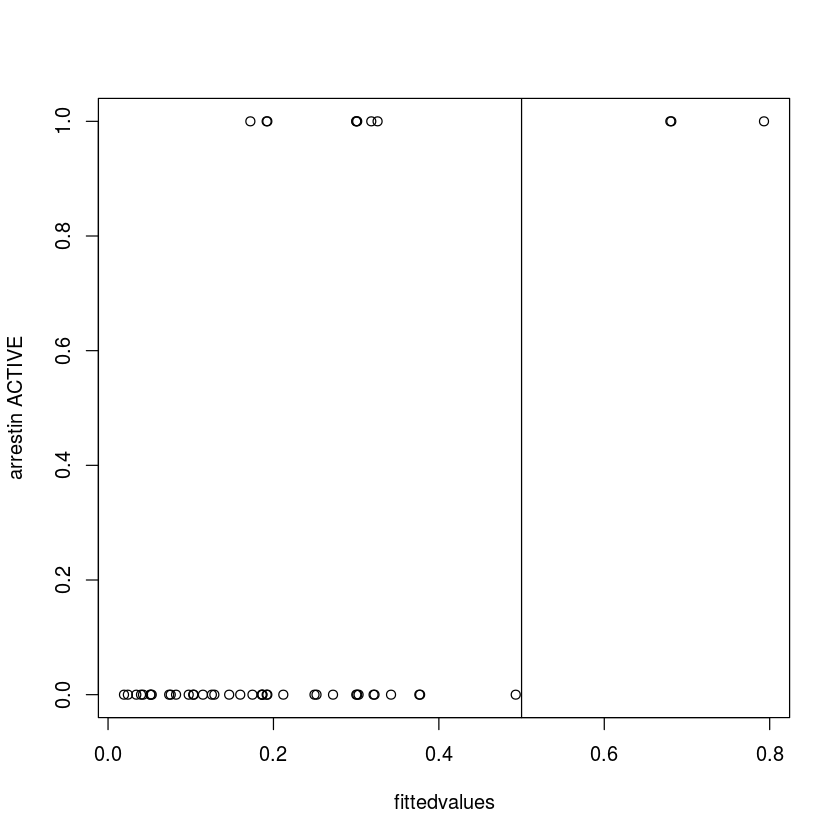

In [231]:
plot(data4[c('fittedvalues','arrestin ACTIVE')])
abline(v=0.5)